Paso 1: Importación de Librerías

In [ ]:
# Paso 1: Importación de Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression 
from xgboost import XGBRegressor


Paso 2: Carga del Dataset

In [22]:

# Cargar el dataset
def load_data():
    diabetes = load_diabetes(as_frame=True)
    df = diabetes.frame
    return df

df = load_data()

# Verificar las columnas del DataFrame
print("Columnas del DataFrame:")
print(df.columns)

# Dividir los datos en características y objetivo
X = df.drop(columns=['target'])
y = df['target']

# Verificar las columnas de X
print("Columnas de X:")
print(X.columns)

# Entrenar el modelo directamente sin preprocesamiento
try:
    model = RandomForestRegressor(random_state=42)
    model.fit(X, y)  # Entrenar el modelo
    predictions = model.predict(X)  # Hacer predicciones
    rmse = np.sqrt(np.mean((predictions - y) ** 2))  # Calcular RMSE
    print(f"RMSE: {rmse}")
except ValueError as e:
    print(f"Error durante el entrenamiento: {e}")

Columnas del DataFrame:
Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6',
       'target'],
      dtype='object')
Columnas de X:
Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')
RMSE: 21.836106815541285


#### Validación cruzada

In [24]:

cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-cv_scores)
print(f"RMSE de validación cruzada: {cv_rmse.mean()} ± {cv_rmse.std()}")

RMSE de validación cruzada: 58.00025188339847 ± 2.595392838833454


Paso 3: Normalización y Preprocesamiento Construcción del Modelo Construir el Pipeline con Múltiples Modelos

In [25]:
# Verificar las columnas del DataFrame
print("Columnas del DataFrame:")
print(df.columns)

# Dividir los datos en características y objetivo
X = df.drop(columns=['target'])
y = df['target']

# Verificar las columnas de X
print("Columnas de X:")
print(X.columns)

# Preprocesar los datos
def preprocess_data():
    numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
    
    numeric_transformer = StandardScaler()

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features)
        ]
    )
    
    return preprocessor

preprocessor = preprocess_data()

# Definir los modelos a evaluar
models = {
    'Random Forest': RandomForestRegressor(random_state=42),
    'Linear Regression': LinearRegression()
}

# Evaluar cada modelo
for model_name, model in models.items():
    # Construir el pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    # Entrenar el modelo con validación cruzada
    try:
        cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='neg_mean_squared_error')
        cv_rmse = np.sqrt(-cv_scores)
        print(f"{model_name} - RMSE de validación cruzada: {cv_rmse.mean():.2f} ± {cv_rmse.std():.2f}")
    except ValueError as e:
        print(f"Error durante la validación cruzada para {model_name}: {e}")

Columnas del DataFrame:
Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6',
       'target'],
      dtype='object')
Columnas de X:
Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')
Random Forest - RMSE de validación cruzada: 57.94 ± 2.61
Linear Regression - RMSE de validación cruzada: 54.69 ± 1.37


#### Explicación del Código
###### Importar Librerías: Se importan las librerías necesarias para el análisis y modelado.

###### Cargar el Dataset: Se carga el conjunto de datos de diabetes utilizando load_diabetes.

###### Dividir en Características y Objetivo: Se separan las características (X) de la variable objetivo (y).

###### Preprocesamiento: Se define un preprocesador que normaliza las características numéricas utilizando StandardScaler.

###### Definir Modelos: Se crea un diccionario models que contiene los modelos que deseas evaluar. En este caso, se incluyen RandomForestRegressor y LinearRegression.

###### Evaluar Cada Modelo: Se itera sobre el diccionario de modelos:

Para cada modelo, se construye un pipeline que incluye el preprocesador y el modelo.

###### Se utiliza cross_val_score para realizar la validación cruzada y calcular el RMSE.

###### Se imprime el RMSE promedio y la desviación estándar para cada modelo.

###### Resultados

###### Al ejecutar este código, obtendrás el RMSE de validación cruzada para cada modelo, lo que te permitirá comparar su rendimiento en el conjunto de datos de diabetes.

###### Conclusión
Este enfoque modular te permite agregar fácilmente más modelos al pipeline y comparar su rendimiento

Comparar diferentes modelos (RandomForest, XGBoost, etc.)

c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Random Forest - Mejor Hiperparámetros: {'model__max_depth': 10, 'model__min_samples_split': 10, 'model__n_estimators': 200}
Random Forest - RMSE de validación cruzada: 57.39
XGBoost - Mejor Hiperparámetros: {'model__learning_rate': 0.01, 'model__max_depth': 3, 'model__n_estimators': 50}
XGBoost - RMSE de validación cruzada: nan


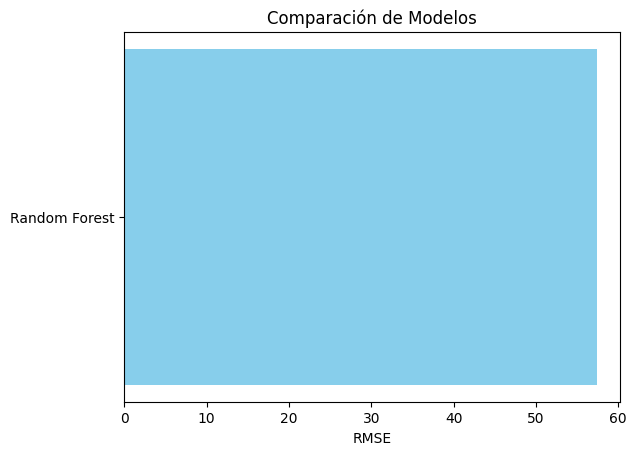

In [27]:
# Definir los modelos y sus hiperparámetros
models = {
    'Random Forest': {
        'model': RandomForestRegressor(random_state=42),
        'params': {
            'model__n_estimators': [50, 100, 200],
            'model__max_depth': [None, 10, 20, 30],
            'model__min_samples_split': [2, 5, 10]
        }
    },
    'XGBoost': {
        'model': XGBRegressor(random_state=42),
        'params': {
            'model__n_estimators': [50, 100, 200],
            'model__max_depth': [3, 5, 7],
            'model__learning_rate': [0.01, 0.1, 0.2]
        }
    }
}

# Evaluar cada modelo con GridSearchCV
results = {}
for model_name, model_info in models.items():
    # Construir el pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model_info['model'])
    ])
    
    # Implementar GridSearchCV
    grid_search = GridSearchCV(pipeline, model_info['params'], cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X, y)
    
    # Guardar los resultados
    results[model_name] = {
        'best_params': grid_search.best_params_,
        'best_score': np.sqrt(-grid_search.best_score_)
    }

# Generar reportes y métricas finales
for model_name, metrics in results.items():
    print(f"{model_name} - Mejor Hiperparámetros: {metrics['best_params']}")
    print(f"{model_name} - RMSE de validación cruzada: {metrics['best_score']:.2f}")

# Visualización de resultados
model_names = list(results.keys())
rmse_scores = [metrics['best_score'] for metrics in results.values()]

plt.barh(model_names, rmse_scores, color='skyblue')
plt.xlabel('RMSE')
plt.title('Comparación de Modelos')
plt.show()

Evaluar cada modelo con GridSearchCV

In [29]:
print("Valores nulos en X:", X.isnull().sum().sum())
print("Valores nulos en y:", y.isnull().sum())

Valores nulos en X: 0
Valores nulos en y: 0


In [30]:
X = X.dropna()
y = y[X.index]  # Asegúrate de que `y` se alinee con `X`

In [36]:
X

,0,1,2,3,4,5,6,7,8,9
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [37]:
y

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

In [31]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # O 'median', 'most_frequent', etc.
X = imputer.fit_transform(X)

In [40]:
print("Valores infinitos en X:", np.isinf(X).sum().sum())
print("Valores infinitos en y:", np.isinf(y).sum())

Valores infinitos en X: 0
Valores infinitos en y: 0


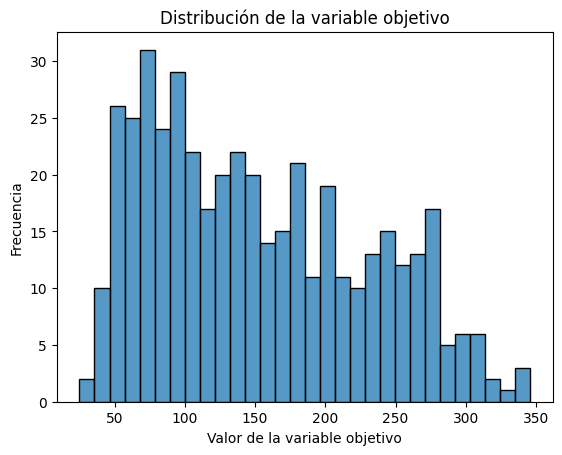

In [44]:
sns.histplot(y, bins=30)
plt.title('Distribución de la variable objetivo')
plt.xlabel('Valor de la variable objetivo')
plt.ylabel('Frecuencia')
plt.show()

In [48]:


# Cargar el dataset
def load_data():
    diabetes = load_diabetes(as_frame=True)
    df = diabetes.frame
    return df

df = load_data()

# Dividir los datos en características y objetivo
X = df.drop(columns=['target'])
y = df['target']

# Preprocesar los datos
def preprocess_data():
    numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
    
    # Crear el imputador
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features)
        ]
    )
    
    return preprocessor

preprocessor = preprocess_data()

# Definir los modelos y sus hiperparámetros
models = {
    'Random Forest': {
        'model': RandomForestRegressor(random_state=42),
        'params': {
            'model__n_estimators': [50, 100, 200],
            'model__max_depth': [None, 10, 20, 30],
            'model__min_samples_split': [2, 5, 10]
        }
    },
    'XGBoost': {
        'model': XGBRegressor(random_state=42),
        'params': {
            'model__n_estimators': [50, 100, 200],
            'model__max_depth': [None, 10, 20, 30],
            'model__learning_rate': [2, 5, 10]
        }
    }
}

# Evaluar cada modelo con GridSearchCV
results = {}
for model_name, model_info in models.items():
    # Construir el pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model_info['model'])
    ])
    
    # Implementar GridSearchCV
    grid_search = GridSearchCV(pipeline, model_info['params'], cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X, y)
    
    # Guardar los resultados
    results[model_name] = {
        'best_params': grid_search.best_params_,
        'best_score': np.sqrt(-grid_search.best_score_)
    }

# Generar reportes y métricas finales
for model_name, metrics in results.items():
    print(f"{model_name} - Mejor Hiperparámetros: {metrics['best_params']}")
    print(f"{model_name} - RMSE de validación cruzada: {metrics['best_score']:.2f}")

Random Forest - Mejor Hiperparámetros: {'model__max_depth': 10, 'model__min_samples_split': 10, 'model__n_estimators': 200}
Random Forest - RMSE de validación cruzada: 57.39
XGBoost - Mejor Hiperparámetros: {'model__learning_rate': 2, 'model__max_depth': None, 'model__n_estimators': 50}
XGBoost - RMSE de validación cruzada: nan


c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(
